# UrbanECG: FloodNet Exploratory Data Analysis
Developer: @mattwfranchi, FARLAB @ Cornell Tech

Last Edited: 12/06/2023

### Description

In [31]:
FLOODNET_DATA = ["../data/nyc_flooding/floodnet-flood-sensor-oct-2023.csv"]
NYC_CT_SHP = "../data/geo/nyc_ct/nyct2020.shp"
NYC_NTA_SHP = "../data/geo/nyc_nta/nynta2020.shp"

In [2]:
### Module Imports 
import sys 
import os 

sys.path.append('../')
from src.utils.logger import setup_logger 
from src.utils.read_csv import read_csv

from user.params.data import COORD_CRS, PROJ_CRS

In [3]:
# Library Imports 
import pandas as pd 
import geopandas as gpd 
import matplotlib.pyplot as plt

In [7]:
# toggle latex plotting 
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
})

In [8]:
floodnet_data = pd.concat([pd.read_csv(f, low_memory=False) for f in FLOODNET_DATA])

In [9]:
floodnet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839341 entries, 0 to 1839340
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   time                         object 
 1   deployment_id                object 
 2   dev_id                       object 
 3   depth_raw_mm                 float64
 4   depth_filt_mm                float64
 5   depth_proc_mm                float64
 6   batt_v                       float64
 7   f_cnt                        float64
 8   dist_mm                      float64
 9   lat                          float64
 10  lon                          float64
 11  date_deployed                object 
 12  deploy_type                  object 
 13  sensor_display_name          object 
 14  sensor_address_street        object 
 15  sensor_address_borough       object 
 16  sensor_address_neighborhood  object 
 17  nearest_weather_station      object 
 18  nearest_tidal_id             object 
 19  

In [10]:
# convert floodnet_data to gdf, usijg 'lat', 'lon'
floodnet_data = gpd.GeoDataFrame(floodnet_data, geometry=gpd.points_from_xy(floodnet_data.lon, floodnet_data.lat), crs=COORD_CRS)
floodnet_data = floodnet_data.to_crs(PROJ_CRS)

In [38]:
# group by deployment id, describe 
floodnet_data.groupby('deployment_id')[['date_deployed', 'deploy_type', 'sensor_address_neighborhood', 'sensor_address_borough']].describe()

date_deployed                                   \
                              count unique                top   freq   
deployment_id                                                          
asleep_apricot_bedbug         16435      1      July 22, 2022  16435   
barely_brave_caiman           41827      1      July 21, 2023  41827   
barely_hot_aphid                  1      1       May 24, 2023      1   
big_pink_elephant             27782      1     March 17, 2023  27782   
blue_eyed_tiger               31302      1      March 9, 2023  31302   
...                             ...    ...                ...    ...   
widely_full_weevil            37806      1       May 19, 2023  37806   
widely_mint_rabbit            36336      1  September 7, 2023  36336   
widely_polite_mink            15605      1     August 4, 2023  15605   
widely_whole_tarpon           40907      1       June 2, 2023  40907   
yearly_frank_mullet            6461      1   October 26, 2023   6461   

                      deploy_type                          \
                            count unique       top   freq   
deployment_id                                               
asleep_apricot_bedbug       16435      1   pluvial  16435   
barely_brave_caiman         41827      1   coastal  41827   
barely_hot_aphid                1      1   pluvial      1   
big_pink_elephant           27782      1   coastal  27782   
blue_eyed_tiger             31302      1   pluvial  31302   
...                           ...    ...       ...    ...   
widely_full_weevil          37806      1  coastal   37806   
widely_mint_rabbit          36336      1   coastal  36336   
widely_polite_mink          15605      1   coastal  15605   
widely_whole_tarpon         40907      1   pluvial  40907   
yearly_frank_mullet          6461      1   pluvial   6461   

                      sensor_address_neighborhood                             \
                                            count unique                 top   
deployment_id                                                                  
asleep_apricot_bedbug                       16435      1        Graniteville   
barely_brave_caiman                         41827      1         City Island   
barely_hot_aphid                                1      1       East Flatbush   
big_pink_elephant                           27782      1      Hamilton Beach   
blue_eyed_tiger                             31302      1  South Williamsburg   
...                                           ...    ...                 ...   
widely_full_weevil                          37806      1       Midland Beach   
widely_mint_rabbit                          36336      1       Midland Beach   
widely_polite_mink                          15605      1         City Island   
widely_whole_tarpon                         40907      1            Bushwick   
yearly_frank_mullet                          6461      1              Hollis   

                             sensor_address_borough                         \
                        freq                  count unique             top   
deployment_id                                                                
asleep_apricot_bedbug  16435                  16435      1   Staten Island   
barely_brave_caiman    41827                  41827      1           Bronx   
barely_hot_aphid           1                      1      1       Brooklyn    
big_pink_elephant      27782                  27782      1          Queens   
blue_eyed_tiger        31302                  31302      1        Brooklyn   
...                      ...                    ...    ...             ...   
widely_full_weevil     37806                  37806      1  Staten Island    
widely_mint_rabbit     36336                  36336      1  Staten Island    
widely_polite_mink     15605                  15605      1           Bronx   
widely_whole_tarpon    40907                  40907      1        Brooklyn   
yearly_frank_mullet    

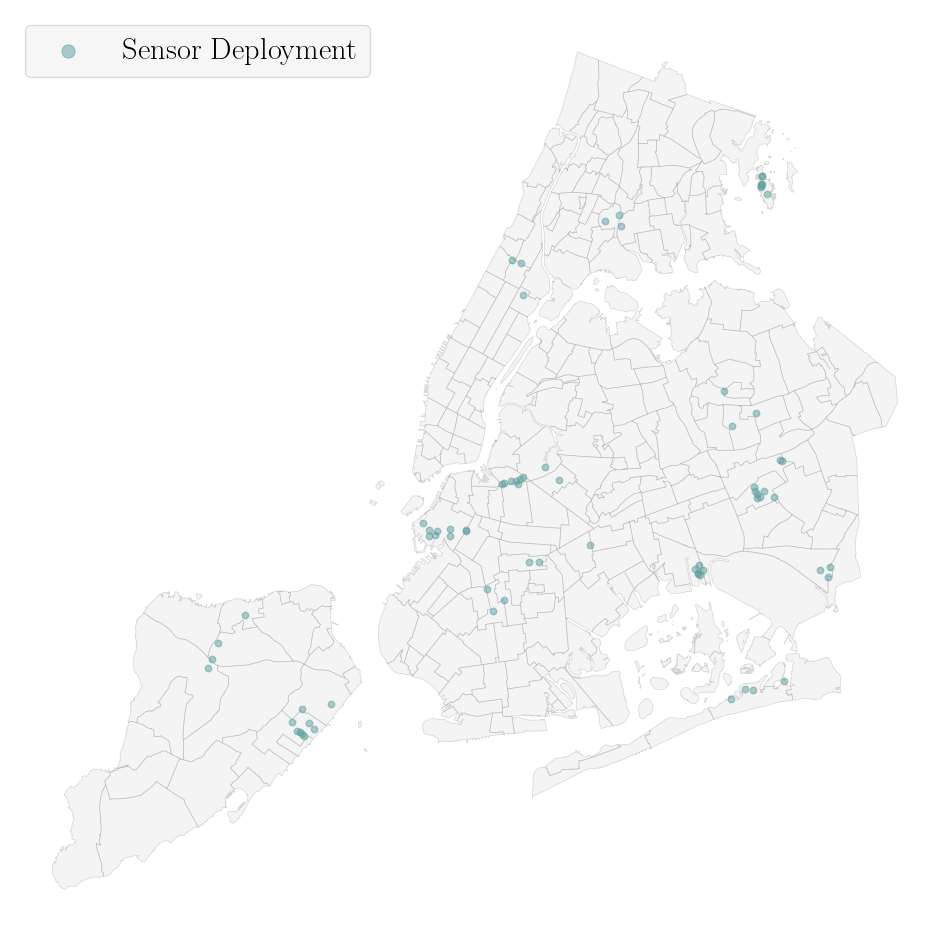

In [47]:
nyc_nta = gpd.read_file(NYC_NTA_SHP).to_crs(PROJ_CRS)

fig, ax = plt.subplots(figsize=(12,12))
nyc_nta.plot(ax=ax, color='gainsboro', edgecolor='grey', alpha=0.3, linewidth=0.5)
floodnet_data.groupby('deployment_id').agg('first').plot(ax=ax, color='cadetblue', markersize=22, alpha=0.5)
#ax.set_title('FloodNet Sensor Deployments', fontsize=20)
# add legend 
ax.legend(['Sensor Deployment'], fontsize=22, loc='upper left', frameon=True, markerscale=2, edgecolor='grey', fancybox=True, facecolor='gainsboro', framealpha=0.25)
ax.set_axis_off()

plt.savefig('../output/street_flooding/plots/floodnet_sensor_deployments.pdf', dpi=300, bbox_inches='tight')

In [48]:
# write sensor deployment locations to a csv 
floodnet_coords = floodnet_data.groupby('deployment_id').agg('first')[['lat', 'lon']]

floodnet_coords.to_csv('../data/nyc_flooding/floodnet_sensor_coordinates.csv')